---

> # <center>EDA - VIDEO GAME SALES 🎮</center>

---

> <center><img src="https://giffiles.alphacoders.com/162/162991.gif"></center>

---

---

# Description

><i>This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of <a href="https://www.vgchartz.com/"><b>vgchartz.com</b></a></i>.

**Fields include**

   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.)

   * Year - Year of the game's release

   * Genre - Genre of the game

   * Publisher - Publisher of the game

   * NA_Sales - Sales in North America (in millions)

   * EU_Sales - Sales in Europe (in millions)

   * JP_Sales - Sales in Japan (in millions)

   * Other_Sales - Sales in the rest of the world (in millions)

   * Global_Sales - Total worldwide sales.

><i>The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.</i><br>
 <i>It is based on BeautifulSoup using Python.</i><br>
 <i>There are 16,598 records. 2 records were dropped due to incomplete information.</i>

---

# Objective

><i> It is possible to divide <b>data analysis</b> into two fields: Hypothesis Generation and Hypothesis Confirmation (Also called confirmatory analysis). In this <b>project</b> I will deal only with <b>exploratory analysis</b>, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from <b>1980</b> to <b>2016</b>. Below is a sketch of all the stages made in these notebooks, following a logical and intuitive sequence to facilitate the understanding of the data.</i>

---

# Outline

**1. Libraries & Data loading**<br>
A. [Used Libraries](#Bibliotecas)<br>
B. [Database Loading](#dados)<br>
C. [Summary of data](#sumario)<br>

**2. Descriptive Analysis**<br>
A. [Frequency Distribution](freq)<br>
B. [Central Trend Measures](#medidas)<br>
C. [Separating Measures](#mensures)<br>
D. [Dispersion Measures](#dispersao)<br>

**3. Exploratory Analysis**<br>
A. [Analysis of the world's best-selling games](#mais)<br>
B. [Number of Sales per platform](#plataforma)<br>
C. [Game Sales by Genre](#genero)<br>
D. [Number of sales per publisher](#published)<br>
E. [Global Sales Number per Year](#y)<br>

---

---

# 1. Libraries & Data loading <br>

## A. Used Libraries

<a id="Bibliotecas"></a>

In [23]:
# Visualizations
# hrbrthemes not needed; we will style plots with seaborn/matplotlib
from matplotlib import animation
import plotly.express as px
import matplotlib.pyplot as plt; import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

## B. Database Loading

<b><font color = "red">Note:</font></b>
    
><i> In this work, as you can see in the code below, I removed a total of <b>271</b> records with invalid values / NaN in the <b>Year</b> column and <b>4</b> records whose three of them it was from <b>2017</b> and one from <b>2020</b>. As described above I will analyze only the data that are in the year range from <b>1980</b> to <b>2016</b></i>

<a id="dados"></a>

In [24]:
# Loading the database
data = pd.read_csv("vgsales.csv")

# Removing the 'Rank' column
data = data.drop(columns=['Rank'])

# Filtering only the records of interest (remove rows with 'N/A' year or year > 2016)
data = data[(data['Year'] != 'N/A') & (data['Year'] != '2017') & (data['Year'] != '2020')]

# If year is numeric, convert to int or category
data['Year'] = data['Year'].astype(str)

# Viewing the first 6 rows
data.head(6)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


## C. Summary of data

<a id="sumario"></a>

In [25]:
data.describe(include='all')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598,16598,16598,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,11493,31,40,12,578,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,2009.0,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2163,1431,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,NaN,NaN,NaN,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,NaN,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,NaN,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


---

# 2. Descriptive Analysis

><i> <b>Descriptive statistics</b> is a scope of statistics that applies various techniques to describe and summarize any data set and studies the general behavior of the observed data, in order to facilitate problem solving. This can be done through <b>frequency tables</b>, <b>graphs</b> and <b>measures of central tendency</b>, such as <b>mean</b>, <b>median</b>, <b>mode</b>, <b>dispersion measures</b> such as <b>standard deviation</b>, <b>percentiles</b> and <b>quartiles</b>.</i>

---
<b><font color = "red">Observação:</font></b>

> The technique used to create the Percent column uses the following formula:

p -> Percent

Freq_x -> Frequency of an element x

$\sum_{i=0}^{n}(Freq_i)$ -> Sum of all frequencies

    
---

> ## $p = 100 * \frac{Freq_x}{\sum_{i=0}^{n}(Freq_i)}$

---


---

> <center><img src="https://apicesistemasdeenergia.com.br/wp-content/uploads/2018/01/An%C3%A1lise-de-Dados-Conceito-1200x480.jpg"></center>

---

---

## A. Frequency Distribution

><i> The first step in an analysis work is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as <b>frequency tables</b>, <b>histograms</b> and <b>bar graphs</b> we can better understand the way in which the phenomena under study are distributed.</i>



<a id = "freq"></a>

### Distribution of quantitative variables

<b><font color = "red">Note:</font></b>

><i> Quantitative variables are characteristics that can be measured on a quantitative scale, that is, they have numerical values that make sense, for example: <b>Height</b>, <b>Income</b>, <b>Weight</b> and <b>Age</b>. And they can be <b>Discrete</b> or <b>Continuous</b>.
</i>

**Discreet**

><i>Variables are classified as <b>discrete quantitative</b> when the set of possible results is finite or enumeral, as an example: <b>Age</b>, <b>Number of Children</b> and <b>students at a school</b>.</i>

**Continuous**

><i> Variables are classified as <b>continuous quantitative</b> when the values are expressed as a range or union of real numbers, such as: <b>Height</b>, <b>Mass</b> and <b>Blood sugar level </b> </i>.

---

><i> The variables that belong to the quantitative category are: <b>Year</b>, <b>NA_Sales</b>, <b>EU_Sales</b>, <b>JP_Sales</b>, <b>Other_Sales</b> and <b>Golbal_Sales</b></i>

---

---

#### Year

<div class="alert alert-block alert-warning"> 
<p>Year -> Year of the game's release</p>
</div>

In [26]:
#'Year' column
frequency = data['Year'].value_counts()  # Frequency
percent = data['Year'].value_counts(normalize=True) * 100  # Percent

# Create a DataFrame combining frequency and percent
freq_year = pd.DataFrame({
    'Frequency': frequency,
    'Percent': percent
})

# Sort by frequency in descending order (value_counts already returns sorted, but to mimic R logic)
freq_year = freq_year.sort_values(by='Frequency', ascending=False)

# Display result
print(freq_year)

        Frequency   Percent
Year                       
2009.0       1431  8.621521
2008.0       1428  8.603446
2010.0       1259  7.585251
2007.0       1202  7.241836
2011.0       1139  6.862273
2006.0       1008  6.073021
2005.0        941  5.669358
2002.0        829  4.994578
2003.0        775  4.669237
2004.0        763  4.596939
2012.0        657  3.958308
2015.0        614  3.699241
2014.0        582  3.506447
2013.0        546  3.289553
2001.0        482  2.903964
1998.0        379  2.283408
2000.0        349  2.102663
2016.0        344  2.072539
1999.0        338  2.036390
1997.0        289  1.741174
nan           271  1.632727
1996.0        263  1.584528
1995.0        219  1.319436
1994.0        121  0.729003
1993.0         60  0.361489
1981.0         46  0.277142
1992.0         43  0.259067
1991.0         41  0.247018
1982.0         36  0.216894
1986.0         21  0.126521
1983.0         17  0.102422
1989.0         17  0.102422
1990.0         16  0.096397
1987.0         16  0

/var/folders/n_/y9bh77n12vl50z0plt3frrph0000gn/T/ipykernel_64988/2051938668.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_top10['Frequency'], y=df_top10.index, palette='viridis', alpha=0.7, edgecolor="black", linewidth=1.1)


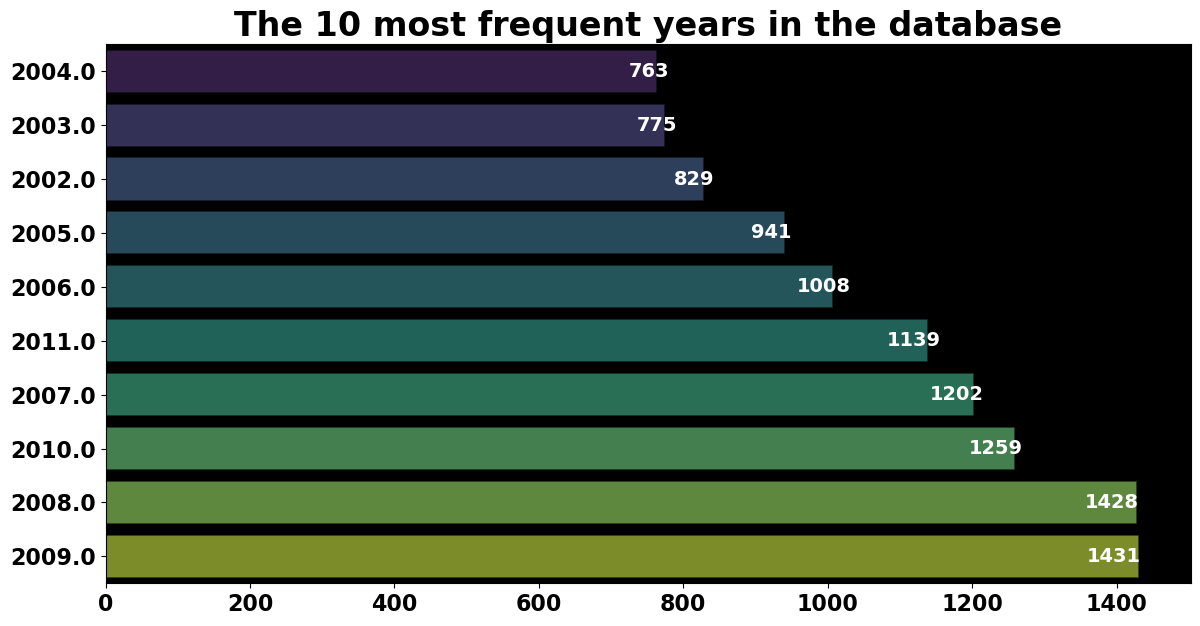

/var/folders/n_/y9bh77n12vl50z0plt3frrph0000gn/T/ipykernel_64988/2051938668.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_bottom10['Frequency'], y=df_bottom10.index, palette='rocket', alpha=0.7, edgecolor="black", linewidth=1.1)


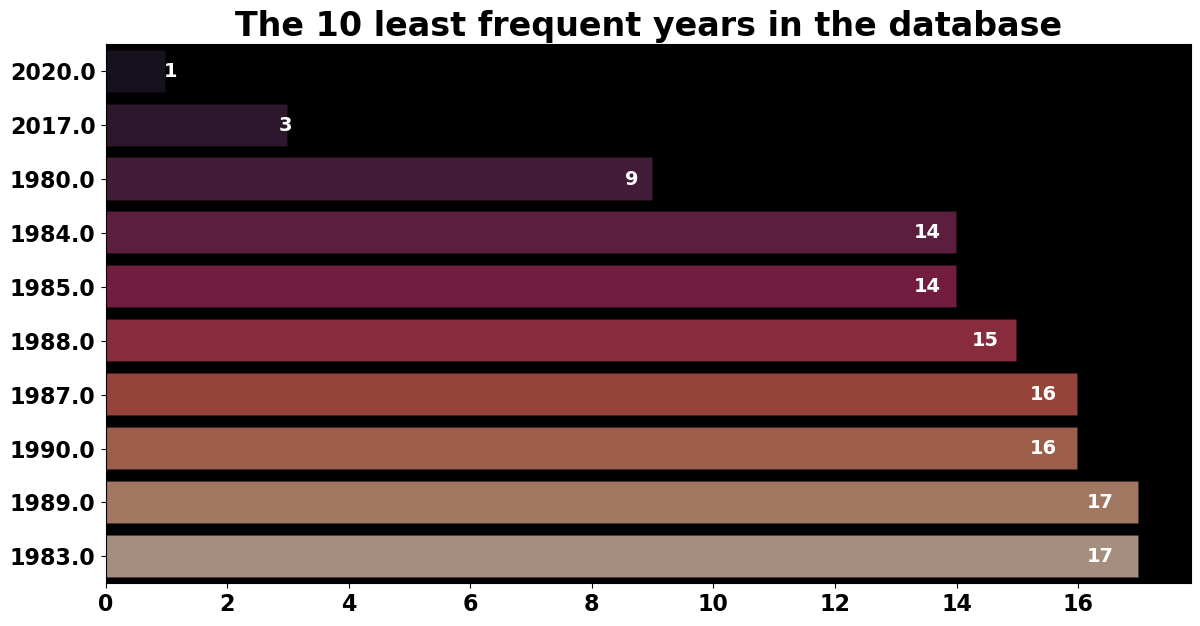

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming freq_year is already computed as before
# freq_year = pd.DataFrame({'Frequency': ..., 'Percent': ...})

# Top 10 most frequent years
df_top10 = freq_year.head(10).copy()
df_top10 = df_top10[::-1]  # reverse for nicer plotting (most frequent on top)

# Plot the top 10
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=df_top10['Frequency'], y=df_top10.index, palette='viridis', alpha=0.7, edgecolor="black", linewidth=1.1)
for i, v in enumerate(df_top10['Frequency']):
    ax.text(v - (v * 0.05), i, str(int(v)), color='white', fontweight='bold', fontsize=14, va='center')
    
plt.title("The 10 most frequent years in the database", fontsize=24, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.gca().set_facecolor('black')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

# Bottom 10 least frequent years
df_bottom10 = freq_year.tail(10).copy()
df_bottom10 = df_bottom10[::-1]  # reverse order

# Plot the bottom 10
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=df_bottom10['Frequency'], y=df_bottom10.index, palette='rocket', alpha=0.7, edgecolor="black", linewidth=1.1)
for i, v in enumerate(df_bottom10['Frequency']):
    ax.text(v - (v * 0.05), i, str(int(v)), color='white', fontweight='bold', fontsize=14, va='center')
    
plt.title("The 10 least frequent years in the database", fontsize=24, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.gca().set_facecolor('black')
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()


---

> ##### | The most frequent 5 years | The least frequent 5 years |

---

| <b>2009</b> - <font color = "green"><b>8.76%</b></font> | <b>1980</b> - <font color = "green"><b>0.05%</b></font> |<br>
| <b>2008</b> - <font color = "green"><b>8.74%</b></font> | <b>1985</b> - <font color = "green"><b>0.08%</b></font> |<br>
| <b>2010</b> - <font color = "green"><b>7.71%</b></font> | <b>1984</b> - <font color = "green"><b>0.08%</b></font> |<br>
| <b>2007</b> - <font color = "green"><b>7.36%</b></font> | <b>1988</b> - <font color = "green"><b>0.09%</b></font> |<br>
| <b>2011</b> - <font color = "green"><b>6.97%</b></font> | <b>1990</b> - <font color = "green"><b>0.09%</b></font> |<br> 
   
---

#### NA_Sales

<div class="alert alert-block alert-warning"> 
<p>NA_Sales -> Sales in North America (in millions)</p>
</div>

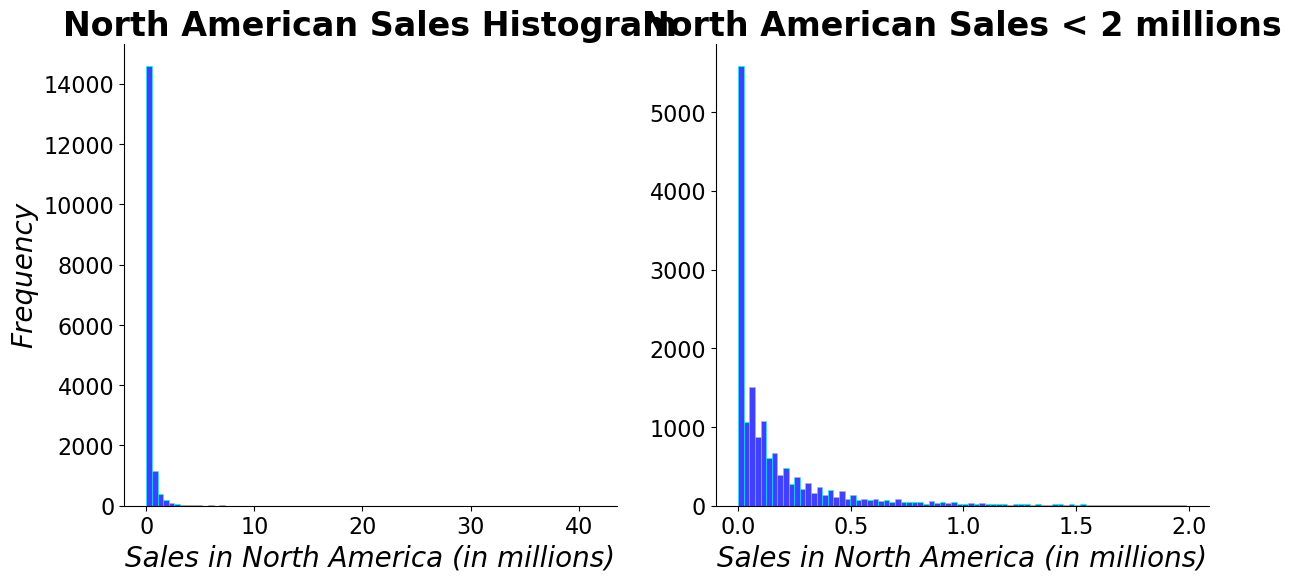

In [28]:
# Create filtered data for < 2 million sales
df_filtered = data[data['NA_Sales'] < 2]

# Set up figure size to mimic ggplot width/height
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for all NA sales
sns.histplot(data=data, x='NA_Sales', bins=80, color='blue', edgecolor='cyan', ax=axes[0])
axes[0].set_title("North American Sales Histogram", fontsize=24, fontweight='bold')
axes[0].set_xlabel("Sales in North America (in millions)", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=20, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_facecolor('white')

# Histogram for NA sales < 2 million
sns.histplot(data=df_filtered, x='NA_Sales', bins=80, color='blue', edgecolor='cyan', ax=axes[1])
axes[1].set_title("North American Sales < 2 millions", fontsize=24, fontweight='bold')
axes[1].set_xlabel("Sales in North America (in millions)", fontsize=20, fontstyle='italic')
axes[1].set_ylabel("", fontsize=20)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_facecolor('white')

# Minimal-style look like theme_minimal
sns.despine()

#### EU_Sales

<div class="alert alert-block alert-warning"> 
<p>EU_Sales -> Sales in Europe (in millions)</p>
</div>

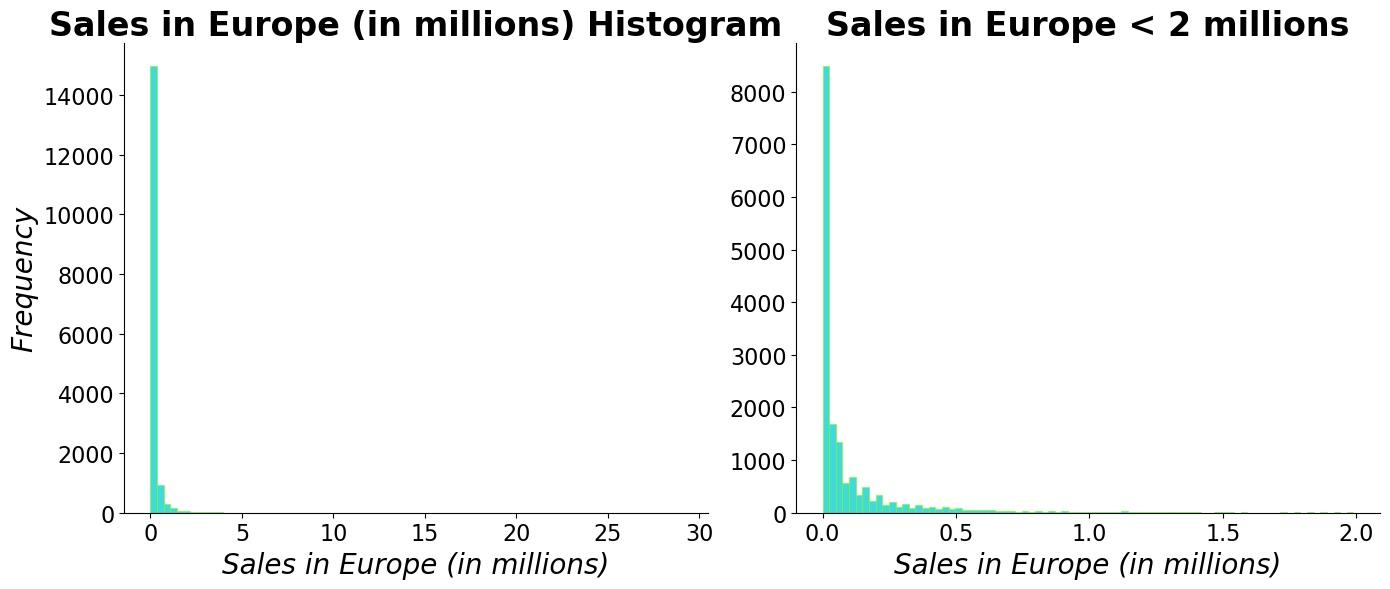

In [29]:

# Filter data where EU_Sales < 2
df_filtered = data[data['EU_Sales'] < 2]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for all EU sales
sns.histplot(data=data, x='EU_Sales', bins=80, 
             color='#00CED1', edgecolor='#7FFF00', ax=axes[0])
axes[0].set_title("Sales in Europe (in millions) Histogram", fontsize=24, fontweight='bold')
axes[0].set_xlabel("Sales in Europe (in millions)", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=20, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_facecolor('white')

# Histogram for EU sales < 2
sns.histplot(data=df_filtered, x='EU_Sales', bins=80, 
             color='#00CED1', edgecolor='#7FFF00', ax=axes[1])
axes[1].set_title("Sales in Europe < 2 millions", fontsize=24, fontweight='bold')
axes[1].set_xlabel("Sales in Europe (in millions)", fontsize=20, fontstyle='italic')
axes[1].set_ylabel("", fontsize=20)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_facecolor('white')

# Clean up borders to mimic theme_minimal
sns.despine()

plt.tight_layout()
plt.show()

#### JP_Sales

<div class="alert alert-block alert-warning"> 
<p>JP_Sales -> Sales in Japan (in millions)</p>
</div>

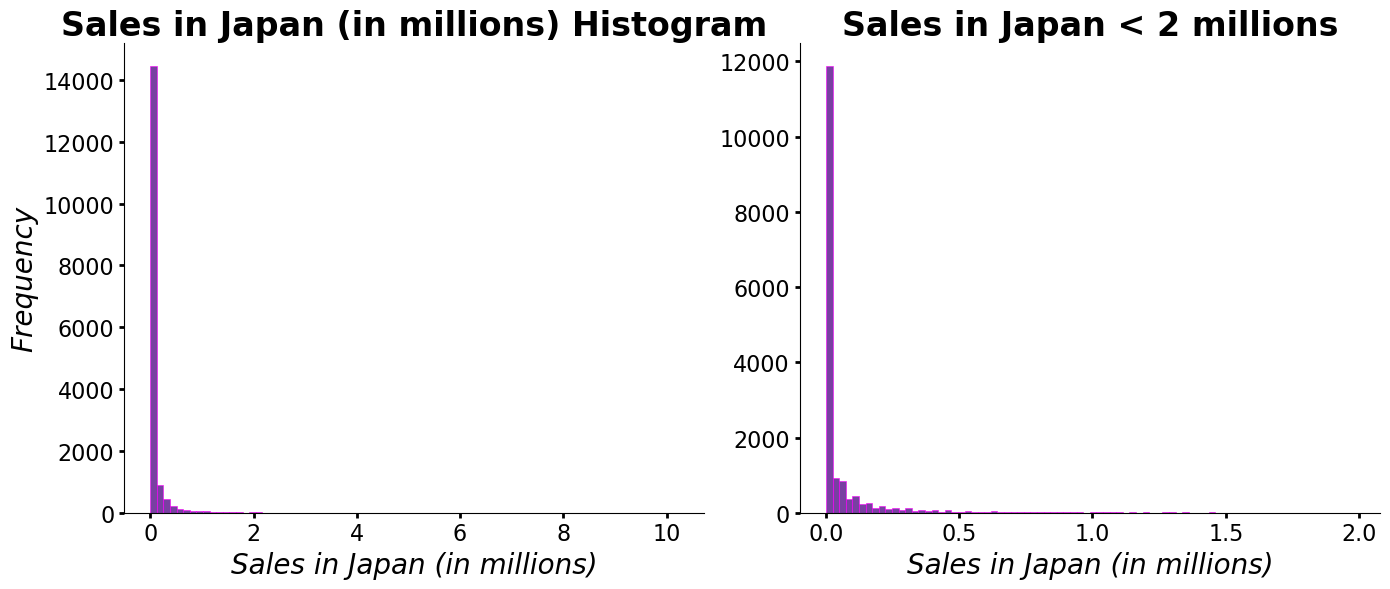

In [30]:
# Filter data for JP_Sales < 2
df_filtered = data[data['JP_Sales'] < 2]

# Set up side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for all Japan sales
sns.histplot(data=data, x='JP_Sales', bins=80, 
             color='#4B0082', edgecolor='#FF00FF', ax=axes[0])
axes[0].set_title("Sales in Japan (in millions) Histogram", fontsize=24, fontweight='bold')
axes[0].set_xlabel("Sales in Japan (in millions)", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=20, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=16, width=2)
axes[0].tick_params(axis='y', labelsize=16, width=2)
axes[0].set_facecolor('white')

# Histogram for Japan sales < 2
sns.histplot(data=df_filtered, x='JP_Sales', bins=80, 
             color='#4B0082', edgecolor='#FF00FF', ax=axes[1])
axes[1].set_title("Sales in Japan < 2 millions", fontsize=24, fontweight='bold')
axes[1].set_xlabel("Sales in Japan (in millions)", fontsize=20, fontstyle='italic')
axes[1].set_ylabel("", fontsize=20)
axes[1].tick_params(axis='x', labelsize=16, width=2)
axes[1].tick_params(axis='y', labelsize=16, width=2)
axes[1].set_facecolor('white')

# Clean up plot borders (theme_minimal style)
sns.despine()

plt.tight_layout()
plt.show()

#### Other_Sales

<div class="alert alert-block alert-warning"> 
<p>Other_Sales -> Sales in the rest of the world (in millions)</p>
</div>

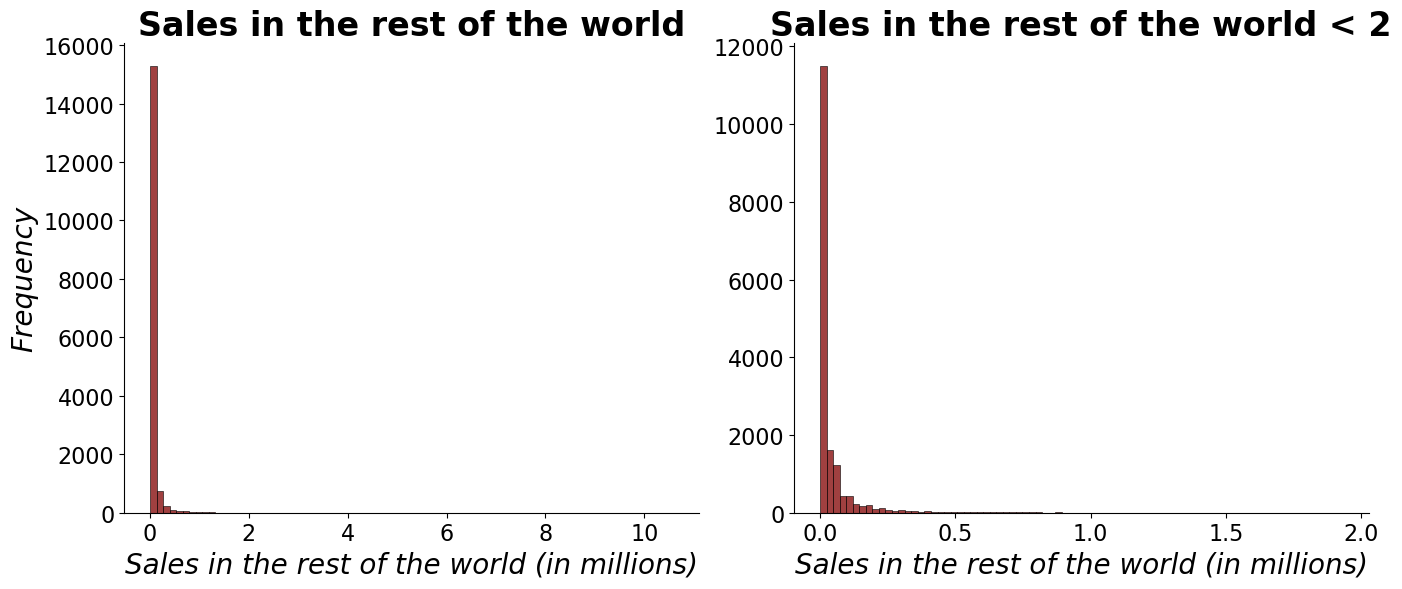

In [31]:
# Filter data for Other_Sales < 2
df_filtered = data[data['Other_Sales'] < 2]

# Set up figure for two side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for all Other_Sales
sns.histplot(data=data, x='Other_Sales', bins=80, 
             color='#800000', edgecolor='black', ax=axes[0])
axes[0].set_title("Sales in the rest of the world", fontsize=24, fontweight='bold')
axes[0].set_xlabel("Sales in the rest of the world (in millions)", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=20, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_facecolor('white')

# Histogram for Other_Sales < 2
sns.histplot(data=df_filtered, x='Other_Sales', bins=80, 
             color='#800000', edgecolor='black', ax=axes[1])
axes[1].set_title("Sales in the rest of the world < 2", fontsize=24, fontweight='bold')
axes[1].set_xlabel("Sales in the rest of the world (in millions)", fontsize=20, fontstyle='italic')
axes[1].set_ylabel("", fontsize=20)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_facecolor('white')

# Remove unnecessary borders (mimic theme_minimal)
sns.despine()

plt.tight_layout()
plt.show()

#### Global_Sales

<div class="alert alert-block alert-warning"> 
<p>Global_Sales -> Total worldwide sales</p>
</div>

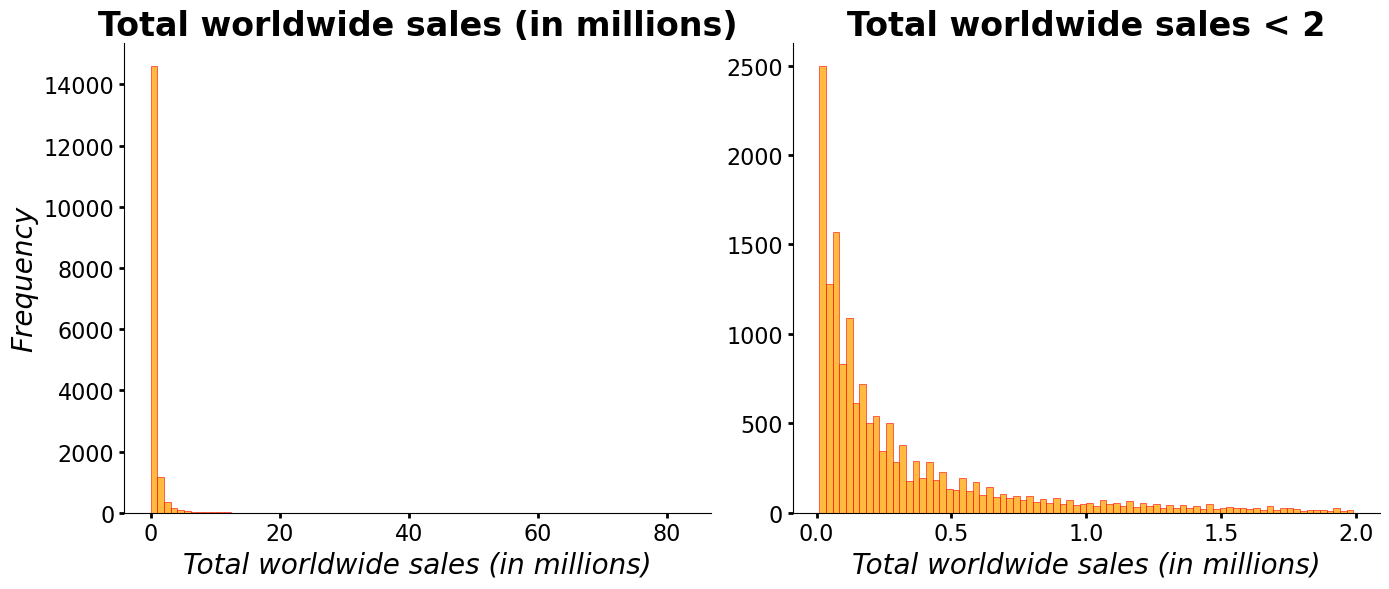

In [32]:
# Filter for Global_Sales < 2
df_filtered = data[data['Global_Sales'] < 2]

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for all Global_Sales
sns.histplot(data=data, x='Global_Sales', bins=80, 
             color='orange', edgecolor='#FF0000', ax=axes[0])
axes[0].set_title("Total worldwide sales (in millions)", fontsize=24, fontweight='bold')
axes[0].set_xlabel("Total worldwide sales (in millions)", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=20, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=16, width=2)
axes[0].tick_params(axis='y', labelsize=16, width=2)
axes[0].set_facecolor('white')

# Histogram for Global_Sales < 2
sns.histplot(data=df_filtered, x='Global_Sales', bins=80, 
             color='orange', edgecolor='#FF0000', ax=axes[1])
axes[1].set_title("Total worldwide sales < 2", fontsize=24, fontweight='bold')
axes[1].set_xlabel("Total worldwide sales (in millions)", fontsize=20, fontstyle='italic')
axes[1].set_ylabel("", fontsize=20)
axes[1].tick_params(axis='x', labelsize=16, width=2)
axes[1].tick_params(axis='y', labelsize=16, width=2)
axes[1].set_facecolor('white')

# Clean layout and remove top/right spines for minimal style
sns.despine()

plt.tight_layout()
plt.show()

><i> With these graphical analysis we can overlook that the sales of video games is mostly below 2 million dollars.</i>

---

### Distribution of qualitative variables

<b><font color = "red">Note:</font></b>


><i> Qualitative variables are characteristics that cannot be measured numerically, such as: <b>Sex</b>, <b>Color</b>, <b>Education</b> and <b>Social Class</b>. And they can be <b>nominal</b> or <b>ordinal</b>.</i>


**Nominal:**

><i> Nominal qualitative variables are the characteristics of a database that do not rank among their categorical ones, such as: <b>Color</b> and <b>Sex</b>.</i>

**Ordinal**

><i> Variables are classified as qualitative ordinal when the categories can be ordered among themselves, such as: <b>Social Classes</b> and <b>Education Level</b>.</i>
    
---

<center><img src = "https://www.sunshinemaths.com/wp-content/uploads/types%20of%20data(1).jpg"></center>
    
---

><i> The variables classified as qualitative of the data set under study are: Name, Platform, Genre and Publisher.</i>
    
---

#### Name

<div class="alert alert-block alert-warning"> 
<p>Name -> The games name</p>
</div>

#### The 5 most frequent games in the database

In [33]:
frequency = data['Name'].value_counts()  # Frequency
percent = data['Name'].value_counts(normalize=True) * 100  # Percent

# Combine into a DataFrame
freq_name = pd.DataFrame({
    'Frequency': frequency,
    'Percent': percent
})

# Sort in descending order and keep the top 5
freq_name = freq_name.sort_values(by='Frequency', ascending=False).head(5)

# Display result
print(freq_name)

                             Frequency   Percent
Name                                            
Need for Speed: Most Wanted         12  0.072298
FIFA 14                              9  0.054223
LEGO Marvel Super Heroes             9  0.054223
Madden NFL 07                        9  0.054223
Ratatouille                          9  0.054223


---

<center><img src = "https://uploaddeimagens.com.br/images/002/724/400/full/Bank_Credit_Card_Process_Flow_%281%29.png?1592946837"></center>

---

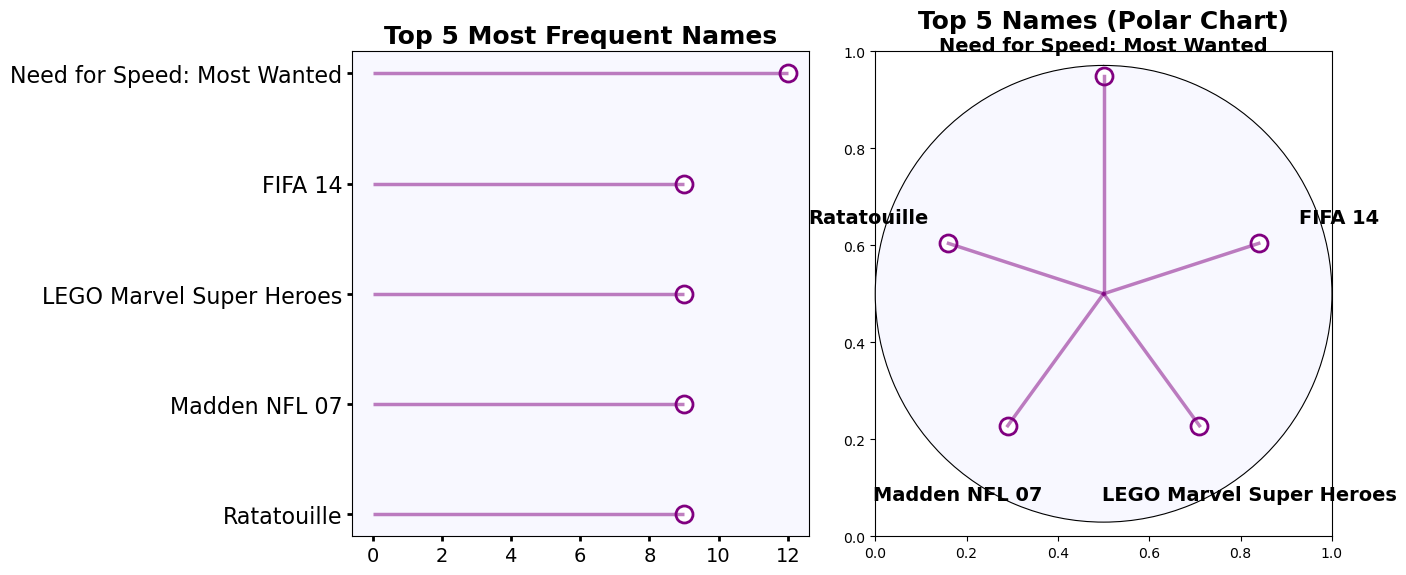

In [34]:
names = freq_name.index
frequencies = freq_name['Frequency']

# --- Create the horizontal lollipop plot (equivalent to geom_segment + geom_point + coord_flip)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot (lollipop chart horizontal)
axes[0].hlines(y=names, xmin=0, xmax=frequencies, color='purple', linewidth=2.5, alpha=0.5)
axes[0].scatter(frequencies, names, s=150, facecolors='white', edgecolors='purple', linewidths=2)
axes[0].set_facecolor('#F8F8FF')
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', labelsize=14, width=2)
axes[0].tick_params(axis='y', labelsize=16, width=2)
axes[0].set_title('Top 5 Most Frequent Names', fontsize=18, weight='bold')
axes[0].invert_yaxis()  # mimic coord_flip
axes[0].grid(False)

# --- Right plot (polar version)
# Convert to angles for polar plotting
angles = np.linspace(0, 2 * np.pi, len(names), endpoint=False).tolist()
frequencies = freq_name['Frequency'].tolist()

# Polar plot setup
ax = axes[1]
polar_ax = fig.add_subplot(1, 2, 2, projection='polar')
polar_ax.set_facecolor('#F8F8FF')
polar_ax.set_theta_offset(np.pi / 2)
polar_ax.set_theta_direction(-1)

# Add segments (lines)
for angle, freq, name in zip(angles, frequencies, names):
    polar_ax.plot([angle, angle], [0, freq], color='purple', alpha=0.5, linewidth=2.5)

# Add points (dots at end of each line)
polar_ax.scatter(angles, frequencies, s=150, facecolors='white', edgecolors='purple', linewidths=2)

# Set name labels around circle
polar_ax.set_xticks(angles)
polar_ax.set_xticklabels(names, fontsize=14, fontweight='bold')
polar_ax.set_yticklabels([])  # Hide radial labels
polar_ax.grid(False)
polar_ax.set_title('Top 5 Names (Polar Chart)', fontsize=18, weight='bold')

plt.tight_layout()
plt.show()


#### Platform

<div class="alert alert-block alert-warning"> 
<p>Platform -> Platform of the games release (i.e. PC,PS4, etc.)</p>
</div>

In [35]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### The 5 most frequent gaming platforms in the database

In [36]:
# Calculate frequency and percentage of each platform
frequency = data['Platform'].value_counts()
percent = data['Platform'].value_counts(normalize=True) * 100

# Combine into a DataFrame
freq_platform = pd.DataFrame({
    'Frequency': frequency,
    'Percent': percent
})

# Sort by frequency and get the top 5
freq_platform = freq_platform.sort_values(by='Frequency', ascending=False).head(5)

# Display result
print(freq_platform)

          Frequency    Percent
Platform                      
DS             2163  13.031691
PS2            2161  13.019641
PS3            1329   8.006989
Wii            1325   7.982890
X360           1265   7.621400


---

<center><img src = "https://uploaddeimagens.com.br/images/002/724/493/full/2.png?1592949029"></center>

---

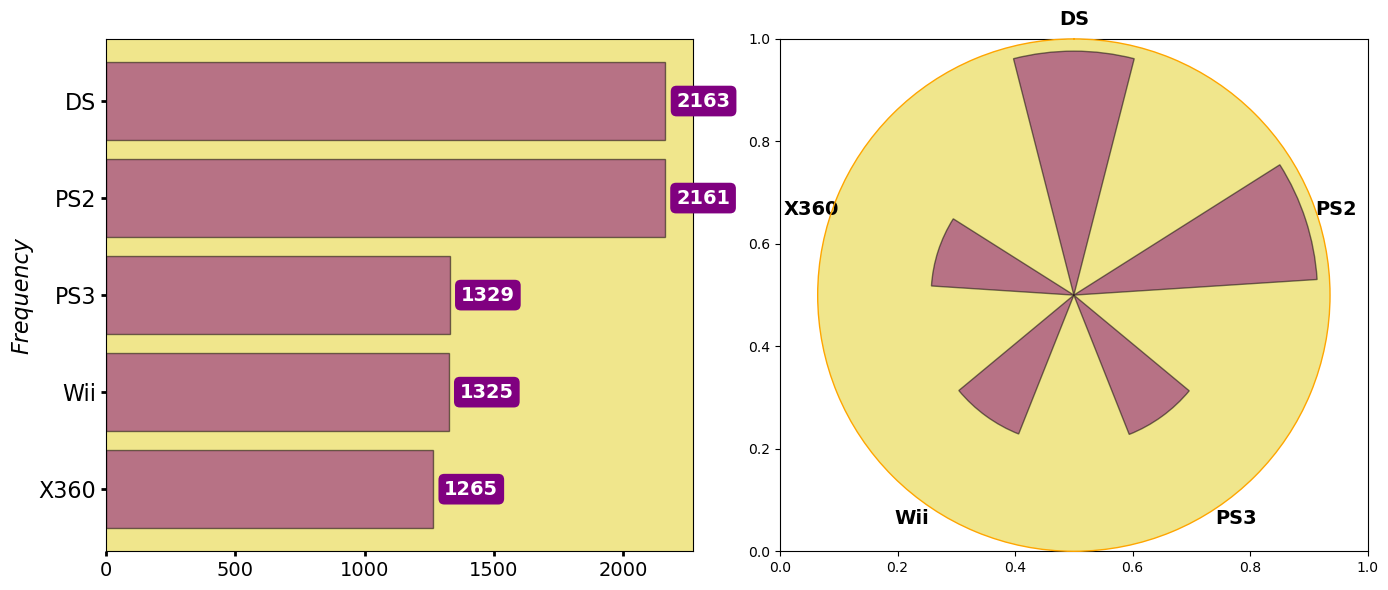

In [37]:
platforms = freq_platform.index
frequencies = freq_platform['Frequency']

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ----------------------------
# (a) Horizontal bar chart
axes[0].barh(platforms, frequencies, color='purple', alpha=0.5, edgecolor='black', linewidth=1)
for i, (freq, platform) in enumerate(zip(frequencies, platforms)):
    axes[0].text(freq + max(frequencies)*0.02, i, str(freq), color='white', fontsize=14, weight='bold',
                 va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="purple", edgecolor="none"))

axes[0].set_facecolor('#F0E68C')
axes[0].set_xlabel("", fontsize=20, fontstyle='italic')
axes[0].set_ylabel("Frequency", fontsize=16, fontstyle='italic')
axes[0].tick_params(axis='x', labelsize=14, width=2)
axes[0].tick_params(axis='y', labelsize=16, width=2)
axes[0].invert_yaxis()  # mimic coord_flip
axes[0].grid(False)

# ----------------------------
# (b) Polar plot
angles = np.linspace(0, 2 * np.pi, len(platforms), endpoint=False).tolist()
frequencies_list = frequencies.tolist()

# Create polar axis
polar_ax = fig.add_subplot(1, 2, 2, projection='polar')
polar_ax.set_facecolor('#F0E68C')
polar_ax.set_theta_offset(np.pi / 2)
polar_ax.set_theta_direction(-1)

# Add bars in polar form
bars = polar_ax.bar(angles, frequencies_list, width=0.5, color='purple', edgecolor='black', alpha=0.5)

# Add platform names around circle
polar_ax.set_xticks(angles)
polar_ax.set_xticklabels(platforms, fontsize=14, fontweight='bold')
polar_ax.set_yticklabels([])  # Hide radial labels
polar_ax.grid(False)

# Background border mimic
for spine in polar_ax.spines.values():
    spine.set_edgecolor("orange")
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

#### Genre

<div class="alert alert-block alert-warning"> 
<p>Genre -> Genre of the game</p>
</div>

---

><i> <b>Electronic games</b> have several variations and subspecies, their categorization may vary according to the aspects to be differentiated. <b>Electronic games</b> also include computer programs, which do not just use the video game console as a support to function.</i>

In [38]:
import pandas as pd

# Calculate frequency and percentage for the 'Genre' column
frequency = data['Genre'].value_counts()
percent = data['Genre'].value_counts(normalize=True) * 100

# Combine frequency and percent into a DataFrame
freq_genre = pd.DataFrame({
    'Frequency': frequency,
    'Percent': percent
})

# Sort in descending order by Frequency (value_counts is already sorted, but for safety)
freq_genre = freq_genre.sort_values(by='Frequency', ascending=False)

# Display result
print(freq_genre)


              Frequency    Percent
Genre                             
Action             3316  19.978311
Sports             2346  14.134233
Misc               1739  10.477166
Role-Playing       1488   8.964936
Shooter            1310   7.892517
Adventure          1286   7.747921
Racing             1249   7.525003
Platform            886   5.337993
Simulation          867   5.223521
Fighting            848   5.109049
Strategy            681   4.102904
Puzzle              582   3.506447


/var/folders/n_/y9bh77n12vl50z0plt3frrph0000gn/T/ipykernel_64988/1872699585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y=freq_genre_plot.index,


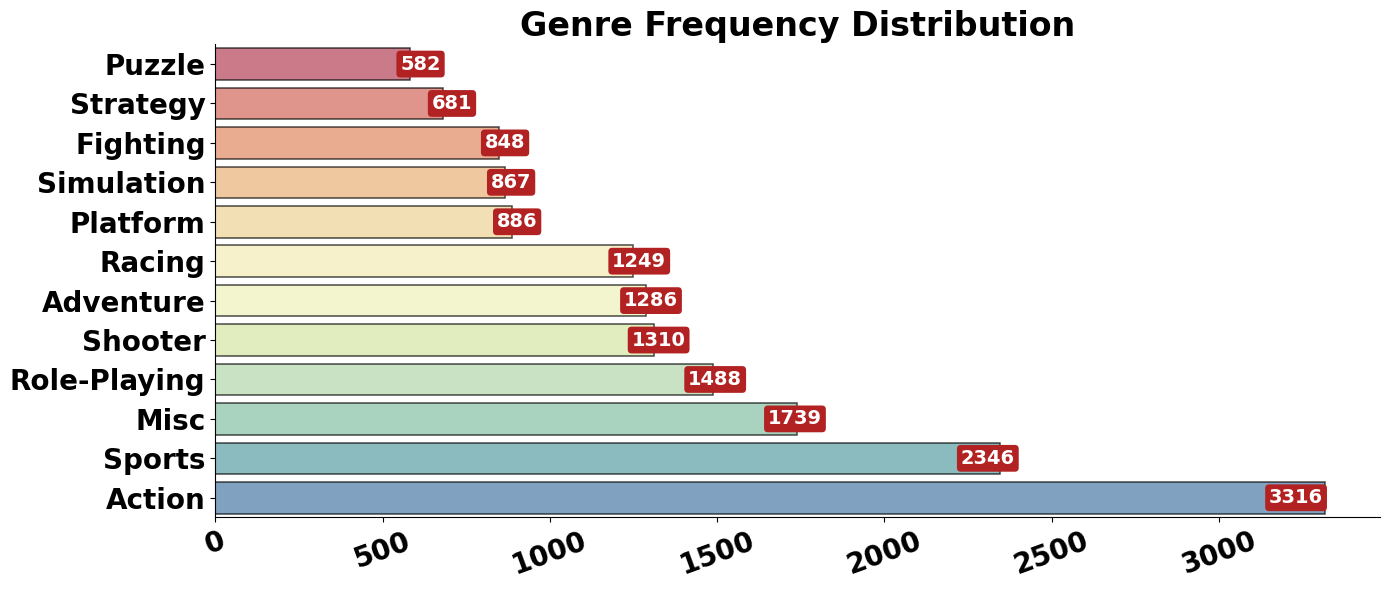

In [39]:
# Prepare data: reverse order for nicer top-to-bottom plotting
freq_genre_plot = freq_genre[::-1]

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Frequency', y=freq_genre_plot.index, 
                 data=freq_genre_plot, 
                 palette='Spectral', edgecolor='black', alpha=0.7, linewidth=1.1)

# Add frequency labels on bars (like geom_label)
for i, (freq, genre) in enumerate(zip(freq_genre_plot['Frequency'], freq_genre_plot.index)):
    ax.text(freq - freq * 0.05, i, str(int(freq)), color='white', fontsize=14, weight='bold', va='center', 
            bbox=dict(facecolor='#B22222', edgecolor='none', boxstyle='round,pad=0.2'))

plt.title("Genre Frequency Distribution", fontsize=24, weight='bold', ha='center')
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=20, weight='bold', rotation=20)
plt.yticks(fontsize=20, weight='bold')
plt.grid(False)
plt.gca().set_facecolor('white')  # mimic theme_ipsum with clean background

sns.despine()
plt.tight_layout()
plt.show()

#### Publisher

<div class="alert alert-block alert-warning"> 
<p>Publisher -> Publisher of the game</p>
</div>

---

><i>An <b>publisher of electronic games</b> is a company that publishes electronic games that they initially produced or that were produced by an electronic game developer and are responsible for the manufacture and marketing of the game.</i>

In [40]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


#### The 10 most frequent Publisher in the database

In [41]:
frequency = data['Publisher'].value_counts()
percent = data['Publisher'].value_counts(normalize=True) * 100

# Combine into a DataFrame
freq_published = pd.DataFrame({
    'Frequency': frequency,
    'Percent': percent
})

# Sort by frequency (just to be explicit) and take the top 10
freq_published = freq_published.sort_values(by='Frequency', ascending=False).head(10)

# Display result
print(freq_published)

                              Frequency   Percent
Publisher                                        
Electronic Arts                    1351  8.168077
Activision                          975  5.894800
Namco Bandai Games                  932  5.634825
Ubisoft                             921  5.568319
Konami Digital Entertainment        832  5.030230
THQ                                 715  4.322854
Nintendo                            703  4.250302
Sony Computer Entertainment         683  4.129383
Sega                                639  3.863362
Take-Two Interactive                413  2.496977


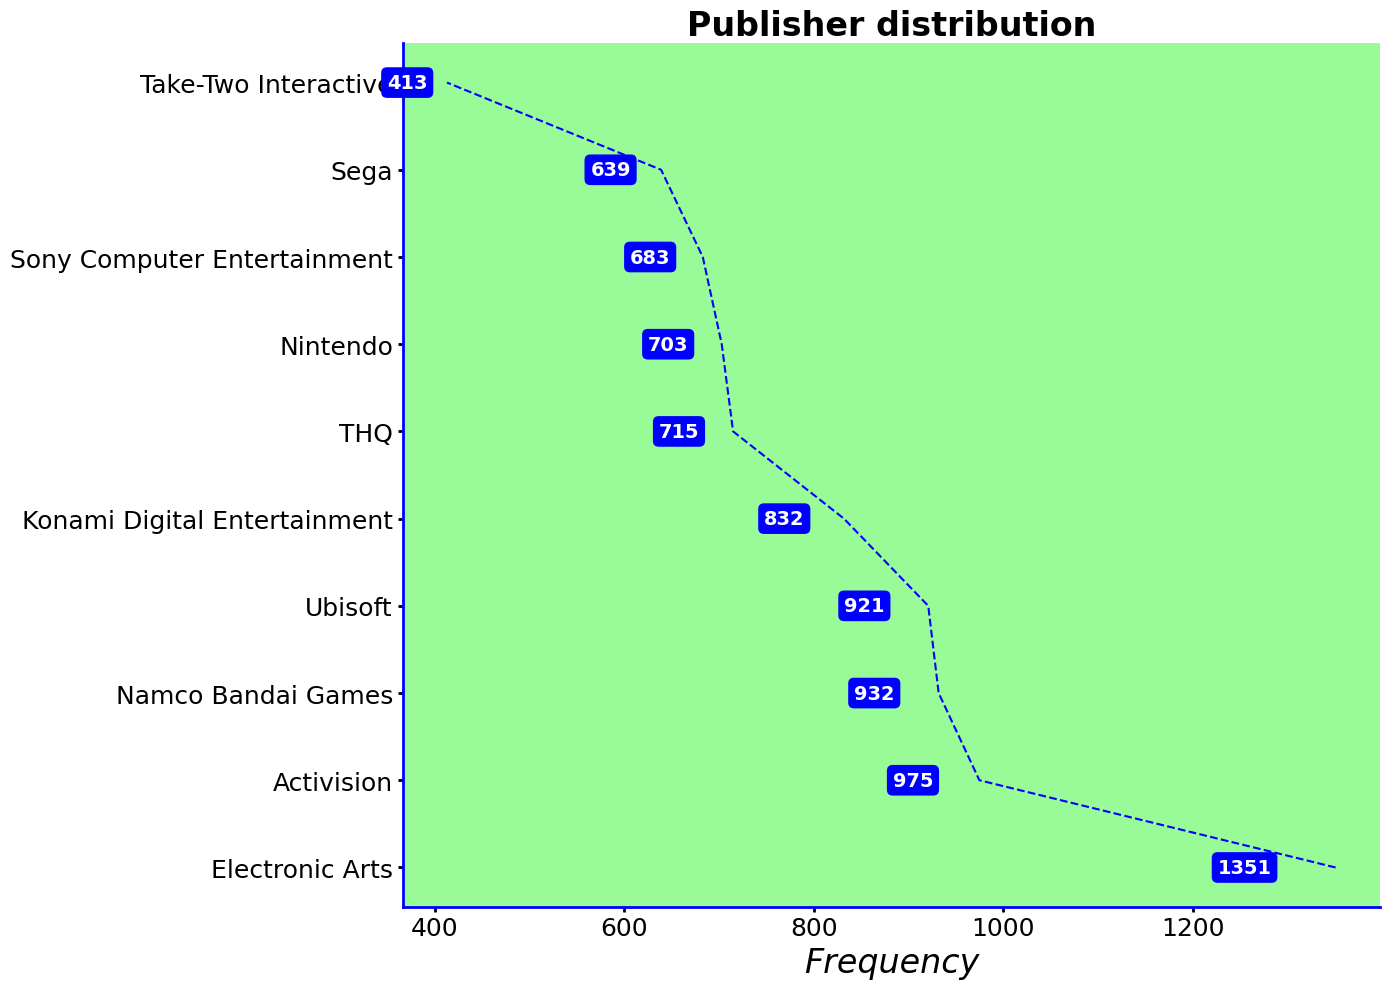

In [42]:
publishers = freq_published.index
frequencies = freq_published['Frequency']

plt.figure(figsize=(14, 10))
ax = plt.gca()

# Create dashed line connecting points (equivalent to geom_line with linetype = dashed)
ax.plot(frequencies, publishers, linestyle='dashed', color='blue', linewidth=1.5)

# Add point labels (like geom_label)
for freq, pub in zip(frequencies, publishers):
    ax.text(freq - (freq * 0.05), pub, str(int(freq)), color='white', fontsize=14, fontweight='bold',
            va='center', ha='right',
            bbox=dict(facecolor='blue', edgecolor='none', boxstyle='round,pad=0.3'))

# Styling
ax.set_facecolor('#98FB98')  # Light green background like in R
ax.set_title("Publisher distribution", fontsize=24, fontweight='bold', ha='center')
ax.set_xlabel("Frequency", fontsize=24, fontstyle='italic')
ax.set_ylabel("", fontsize=24, fontstyle='italic')
ax.tick_params(axis='x', labelsize=18, width=2)
ax.tick_params(axis='y', labelsize=18, width=2)
ax.grid(False)

# Add a border around the plot to mimic element_rect color = blue
for spine in ax.spines.values():
    spine.set_edgecolor("blue")
    spine.set_linewidth(2)

sns.despine()
plt.tight_layout()
plt.show()

---

## B. Central Trend Measures

><i> In statistics, a <b>central trend</b> is a central value or typical value for a probability distribution. The most common measures of central tendency are the <b>arithmetic mean</b>, the <b>median</b> and <b>mode</b>.</i>

<a id="medidas"></a>

### Mean

><i>In statistics, <b>mean</b> is defined as the value that shows the concentration of the data in a distribution, as the equilibrium point of the frequencies in a histogram. <b>Average</b> is also interpreted as a significant value in a list of numbers.</i>

---

> ## $\mu = \frac{1}{n}\sum_{i=0}^{n}X_i$

---

In [43]:
# Calculate the mean of each sales column
mean_values = {
    'NA_Sales': data['NA_Sales'].mean(),
    'EU_Sales': data['EU_Sales'].mean(),
    'JP_Sales': data['JP_Sales'].mean(),
    'Other_Sales': data['Other_Sales'].mean(),
    'Global_Sales': data['Global_Sales'].mean()
}

# Convert into a DataFrame
df_means = pd.DataFrame.from_dict(mean_values, orient='index', columns=['Mean'])

# Display the result
print(df_means)


                  Mean
NA_Sales      0.264667
EU_Sales      0.146652
JP_Sales      0.077782
Other_Sales   0.048063
Global_Sales  0.537441
